### Kaggle competition : https://www.kaggle.com/competitions/digit-recognizer/overview

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Reshape

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Importing Dataset

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Normalization and reshaping

In [5]:
X = train.drop(['label'], 1).values
y = train['label'].values

test_x = test.values

X = X / 255.0
test_x = test_x / 255.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Reshape images into 3 dimensions



In [6]:
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)
y = to_categorical(y)

## Split training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

I choose to split the dataset in two parts: 
90% for training 
10% for testing

## Defining the model

I have used the Sequential API. 

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

In [9]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) , batch_size = 32)
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/30
1182/1182 [==============================] - 29s 16ms/step - loss: 0.1874 - accuracy: 0.9511 - val_loss: 0.0742 - val_accuracy: 0.9790
Epoch 2/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0786 - accuracy: 0.9783 - val_loss: 0.0715 - val_accuracy: 0.9805
Epoch 3/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0541 - val_accuracy: 0.9836
Epoch 4/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0527 - accuracy: 0.9849 - val_loss: 0.0765 - val_accuracy: 0.9893
Epoch 5/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0425 - accuracy: 0.9885 - val_loss: 0.0673 - val_accuracy: 0.9790
Epoch 6/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0381 - accuracy: 0.9892 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 7/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 0.0374 -

Using adam and including the maxpooling, the above code results in good test accuracy. Submission on kaggle using the above CNN architecture resulted in a rank of top 500.

### Lets try to expermiment with dropout and adding few more layers. 

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

#rank in 270s

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_5 (Batc  (None, 12, 12, 32)      

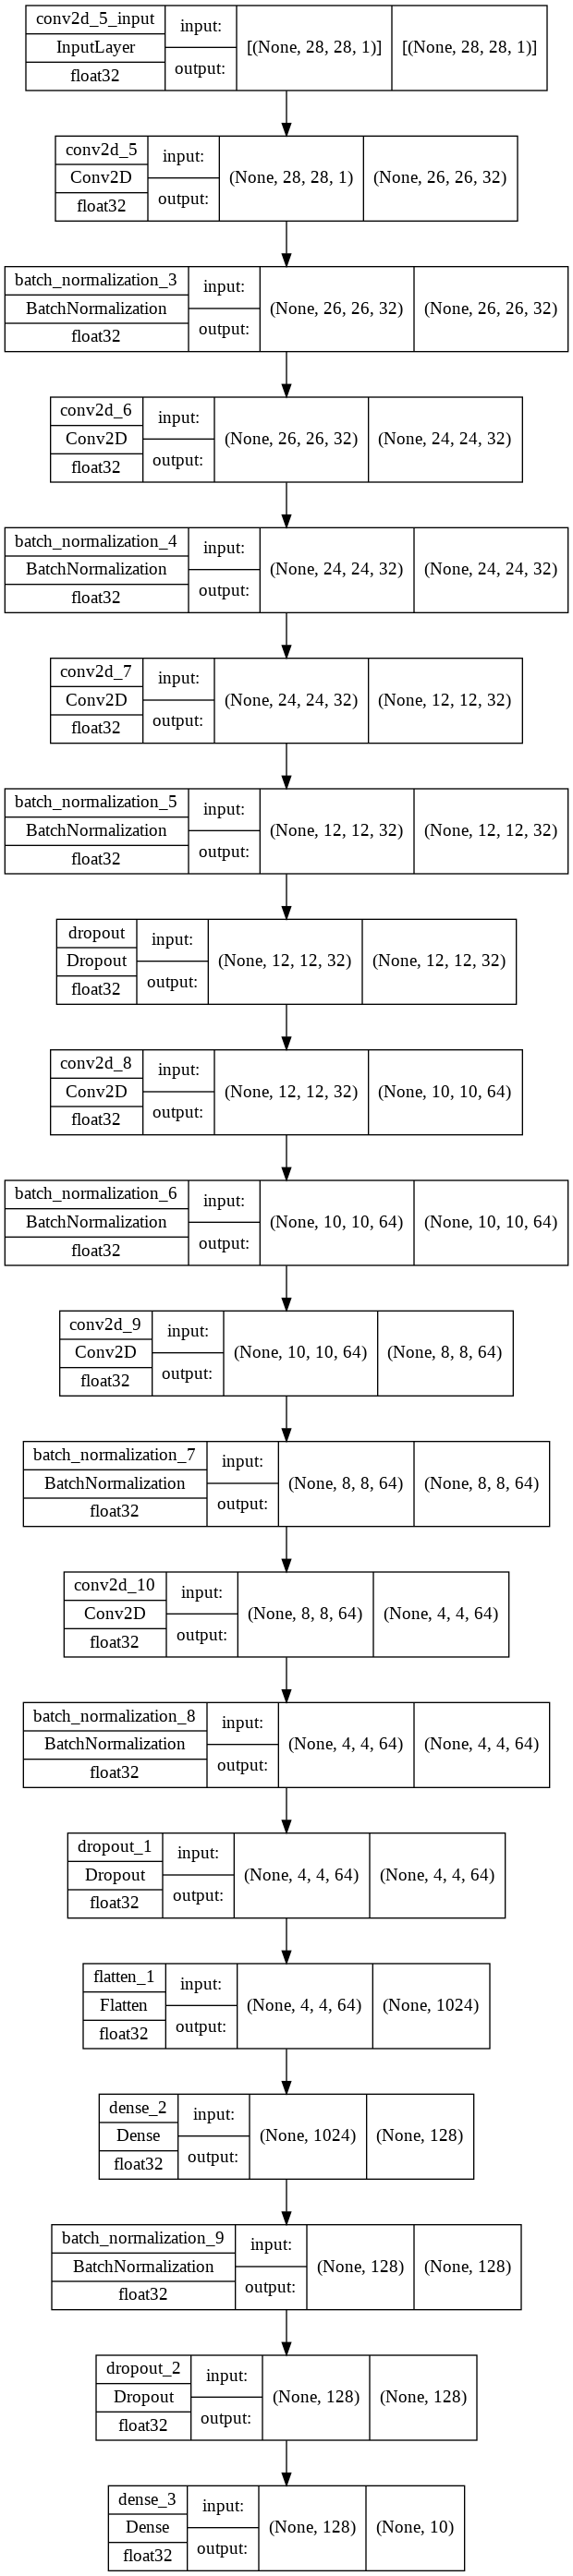

In [13]:
keras.utils.plot_model(model, show_dtype=True, show_shapes=True, 
                       show_layer_names=True)

In [14]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) , batch_size = 64)
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/30
591/591 [==============================] - 12s 18ms/step - loss: 0.2415 - accuracy: 0.9279 - val_loss: 0.0883 - val_accuracy: 0.9745
Epoch 2/30
591/591 [==============================] - 10s 17ms/step - loss: 0.0888 - accuracy: 0.9744 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 3/30
591/591 [==============================] - 10s 18ms/step - loss: 0.0700 - accuracy: 0.9799 - val_loss: 0.0484 - val_accuracy: 0.9871
Epoch 4/30
591/591 [==============================] - 10s 17ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0430 - val_accuracy: 0.9874
Epoch 5/30
591/591 [==============================] - 10s 17ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 6/30
591/591 [==============================] - 10s 17ms/step - loss: 0.0523 - accuracy: 0.9845 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 7/30
591/591 [==============================] - 10s 17ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.0299 - val_accuracy:

This architecture seems to have better accuracy than the previous one. This shows that add dropout layer can affect the CNN model.

## Predication validation

In [17]:
y_test[10].argmax()

7

Real label of X_test[10] =  7

In [18]:
y_pred_print =  model.predict(X_test)
y_pred_print[10].argmax()

7

Predicted label of X_test[10] =  7

## Visualization of accuracy and loss


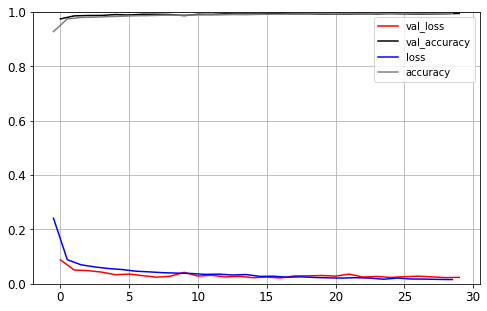

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,29,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,29,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

## Kaggle Submission File

In [20]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)


results = model.predict(test_x)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission_batch_dropout.csv",index=False)


### KAGGLE RANK

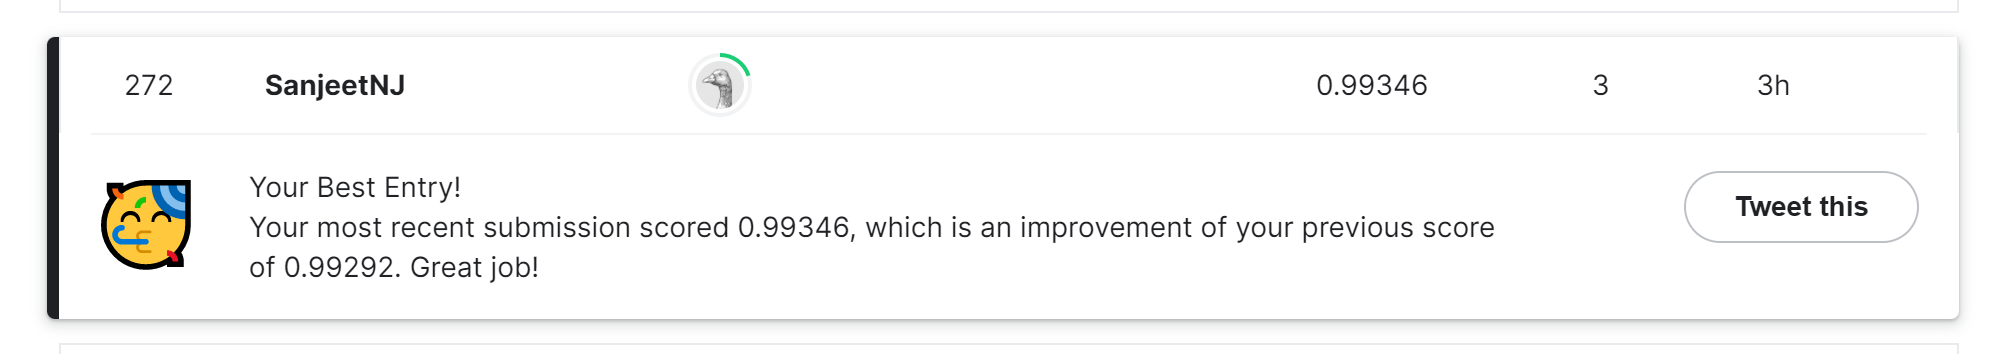